# Numerically solving the Schrodinger equation

In this assignment you will use [<tt>qmsolve</tt>](https://github.com/quantum-visualizations/qmsolve) to solve the time-independent Schrodinger equation in one dimension and plot the solutions.

### First, install <tt>qmsolve</tt> in one of two ways:
<ul>
    <li>From a <tt>unix</tt> command line, type <tt>pip install qmsolve</tt></li>
    <li>Put the following commands in a code cell in this notebook and execute:<br />
        <tt>import sys</tt><br />
        <tt>!{sys.executable} -m pip install qmsolve</tt></li>
</ul>

### Homework problems:

<ol start=0>
    <li>Follow the link to the <tt>qmsolve</tt> GitHub page above. Click the link for the <tt>examples</tt> folder, then click on the <tt>eigenstate solver examples</tt> folder. Finally, click on <tt>1D_harmonic_oscillator.py</tt> to see a short code snippet that will calculate wavefunctions for a simple harmonic oscillator (SHO).</li>
    <li><tt>1D_harmonic_oscillator.py</tt> imports the <tt>Hamiltonian</tt> class from <tt>qmsolve</tt>. In quantum mechanics, what is a Hamiltonian? Please use multiple sources to formulate your answer and cite those sources. For this problem, crowd-sourced references such as Wikipedia and stackexchange are acceptable.</li>
    <li>Which force law is defined in the function <tt>harmonic_oscillator()</tt> in cell 2 of this notebook?</li>
    <li>What are the eigenstates referred to in lines 22 and 23 in <tt>1D_harmonic_oscillator.py</tt>? Again, please use multiple sources to formulate your answer and cite those sources.
    <li>Code cells 1 and 2 below contain imported code from <tt>1D_harmonic_oscillator.py</tt>, including a visualization of eigenstate 0 of the SHO. In subsequent code cells, plot any five SHO eigenstates of your choice.</li>
</ol>

Note: you can write your answers to the non-code problems in a markdown cell. From within a new notebook cell, click the box with a double arrow that says "Code" and change to "Markdown". Then you can just type in the cell like a regular text file.

1. A Hamiltonian in quantum mechanics is an operator that represents the sum of all the energy operators (kinetic and potential) of a system. It is useful for finding the time evolution of a wave function.
https://en.wikipedia.org/wiki/Hamiltonian_(quantum_mechanics)
http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/hamil.html

2. Hooke's law

3. Eigenstates of the Hamiltonian represent the possible energies a particle can have within a quantum system. An eigenstate of the Hamiltonian is time-independent, so it can become quite useful.


https://physics.stackexchange.com/questions/41070/what-is-an-energy-eigenstate-exactly
https://www2.ph.ed.ac.uk/~gja/qp/qp1.pdf

#4 is plotted towards the bottom

5. The x-axis of my plots represent spatial position within the harmonic oscillator 

6. My plots are showing wave functions, not probability functions because you cannot have negative probability values. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

from qmsolve import Hamiltonian, SingleParticle, init_visualization, Å, eV


Computing...
Took 0.149216890335083
[ 13.8243627   41.46350403  69.08346722  96.68423227 124.26577906
 151.82808744 179.37113718 206.89490796 234.39937942 261.8845311
 289.35034249 316.79679298 344.22386192 371.63152856 399.01977209
 426.38857162 453.73790619 481.06775475 508.3780962  535.66890934
 562.9401729  590.19186555 617.42396585 644.63645231 671.82930335
 699.00249732 726.15601246 753.28982697 780.40391895 807.49826642]


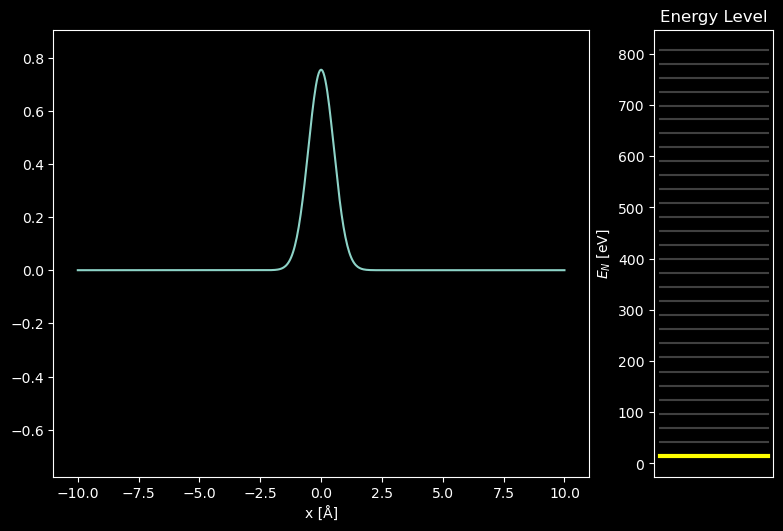

In [3]:
# Harmonic oscillator potential
def harmonic_oscillator(particle):
    k = 100 * eV / Å**2
    return 0.5 * k * particle.x**2

# Define the Hamiltonian
H = Hamiltonian(particles = SingleParticle(), potential = harmonic_oscillator, 
                spatial_ndim = 1, N = 512, extent = 20*Å)

#Diagonalize the Hamiltonian and compute the eigenstates
eigenstates = H.solve(max_states = 30)

# Print out the energies of the eigenstates
print(eigenstates.energies) # the printed energies are expressed in eV

# Visualize the Eigenstates
visualization = init_visualization(eigenstates)
visualization.plot_eigenstate(0)

<ol start=5>
    <li>What is on the x-axis of your plots?</li>
    <li>Are your plots showing wave functions $\psi(x)$ or probability functions $\psi^*(x) \psi(x)$? How do you know?</li>
</ol>

### New potential: infinite square well

Below I define the infinite square well potential and plot the two lowest-energy eigenstates (compare to Figure 6.3 in your textbook).

Computing...
Took 0.022059202194213867
[  0.58926935   2.35704264   5.30321556   9.4276143   14.7299955
  21.21004635  28.8673845   37.70155819  47.71204619  58.89825789
  71.2595333   84.79514311  99.50428872 115.3861023  132.43964681
 150.6639161  170.05783494 190.6202591  212.34997539 235.24570176
 259.30608737 284.52971266 310.91508944 338.46066097 367.16480207
 397.0258192  428.04195057 460.21136622 493.53216816 528.00239048]


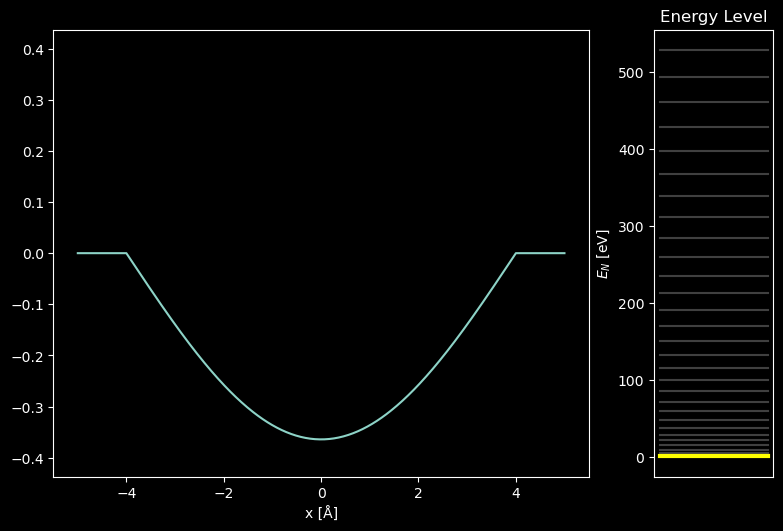

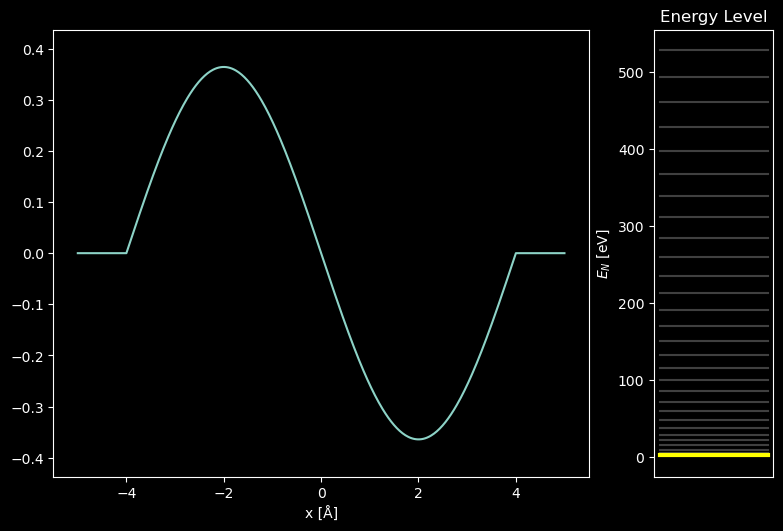

In [4]:
# 8 angstrom-wide infinite square well
def infinite_square_well(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 4*Å
    potential[out_of_bounds] = np.inf
    return potential

# Define the Hamiltonian of the infinite square well
H_sw = Hamiltonian(particles = SingleParticle(), potential = infinite_square_well, 
                   spatial_ndim = 1, N = 512, extent = 10*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_sw = H_sw.solve(max_states = 30)

print(eigenstates_sw.energies)

# Visualize the infinite square well eigenstates
visualization_sw = init_visualization(eigenstates_sw)
visualization_sw.plot_eigenstate(0)
visualization_sw.plot_eigenstate(1)

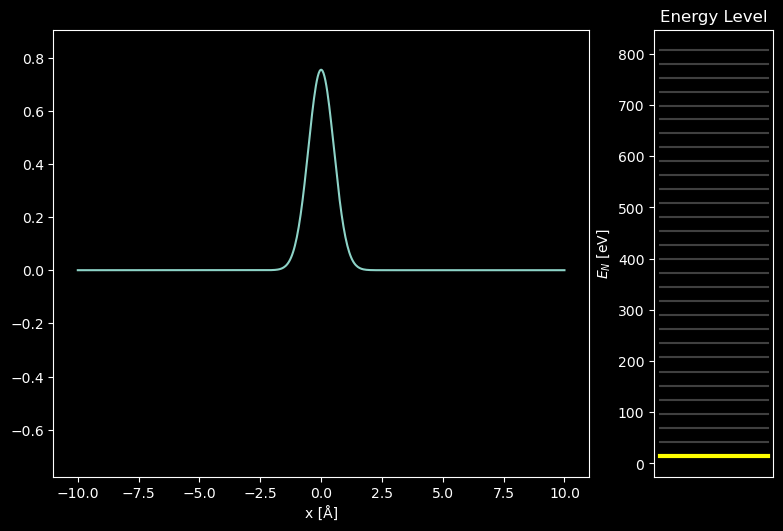

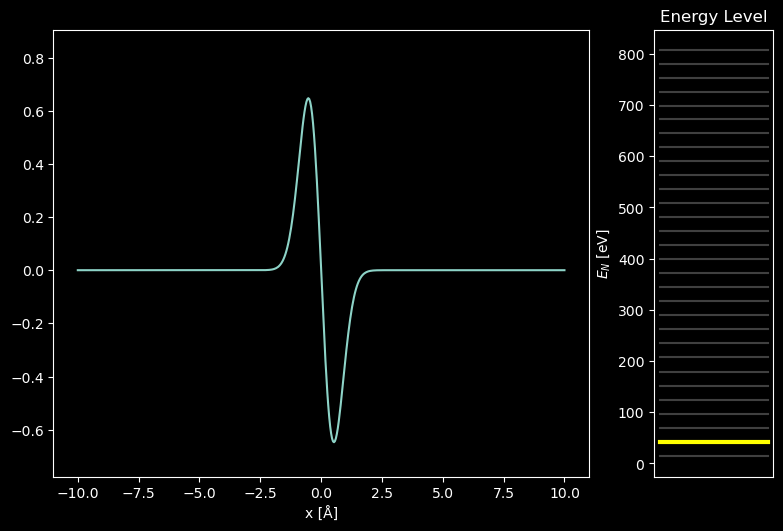

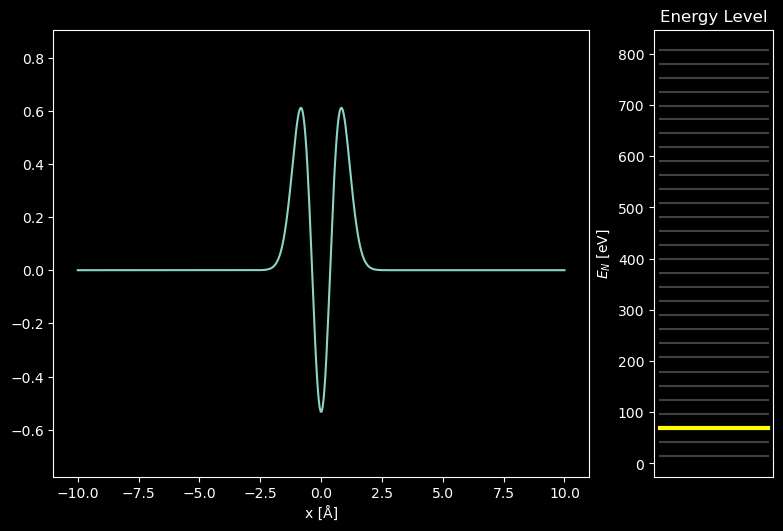

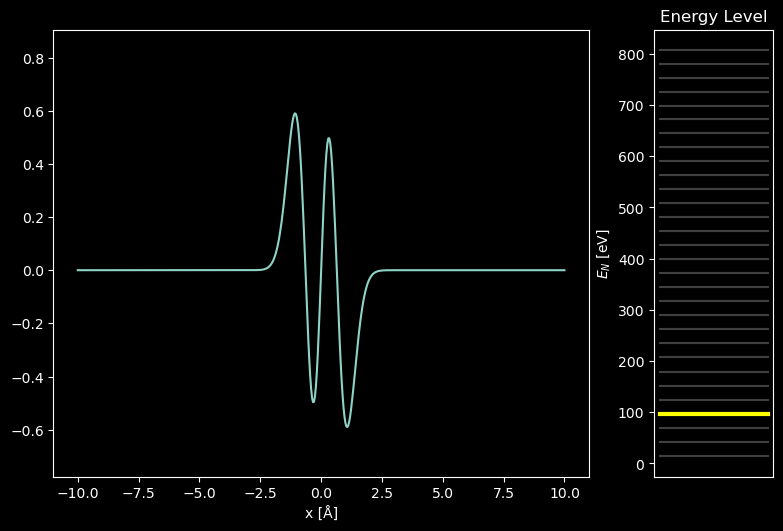

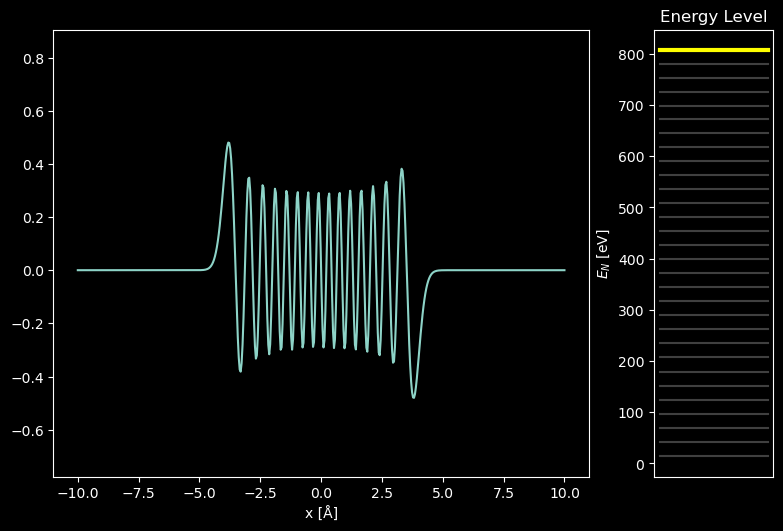

In [6]:
#4:
visualization.plot_eigenstate(0)
visualization.plot_eigenstate(1)
visualization.plot_eigenstate(2)
visualization.plot_eigenstate(3)
visualization.plot_eigenstate(29)

<ol start=7>
    <li>Plot any three infinite square well eigenstates of your choice.</li>
    <li>What property do the infinite square well eigenstates have that's different than the SHO eigenstates? (Hint: think about the properties of valid wave functions we discussed in class)</li>
    <li>What is the relationship between the number of extrema (maxima plus minima) in each eigenstate plot and the quantum number of the eigenstate?</li>
</ol>

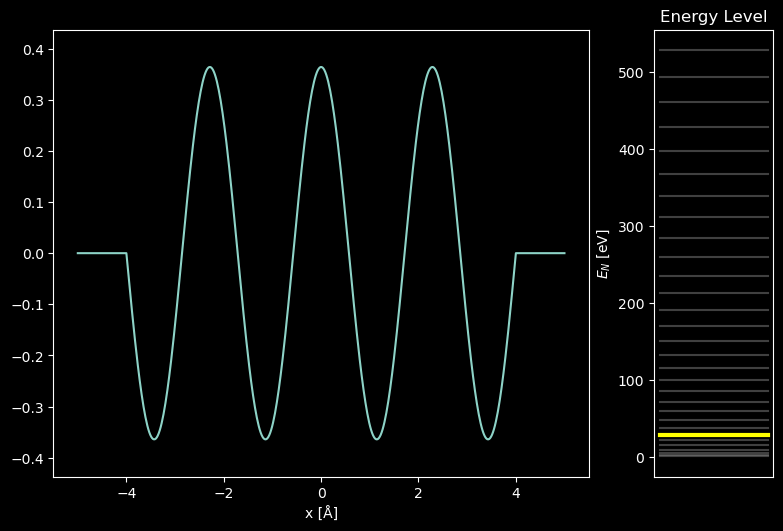

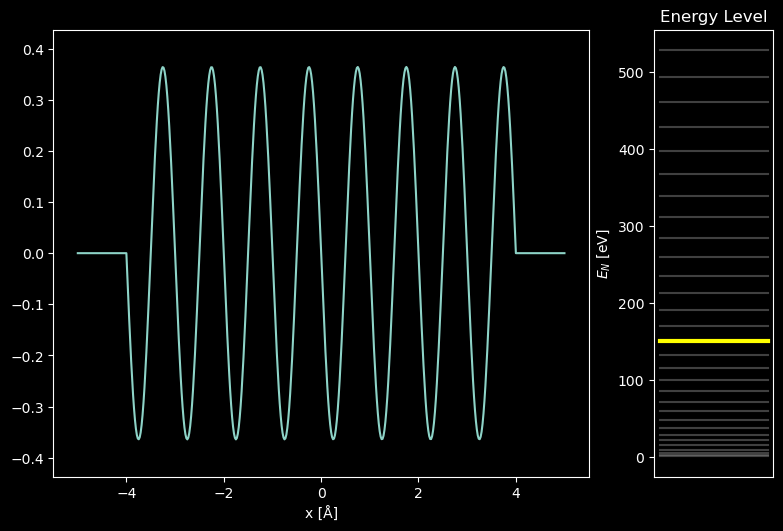

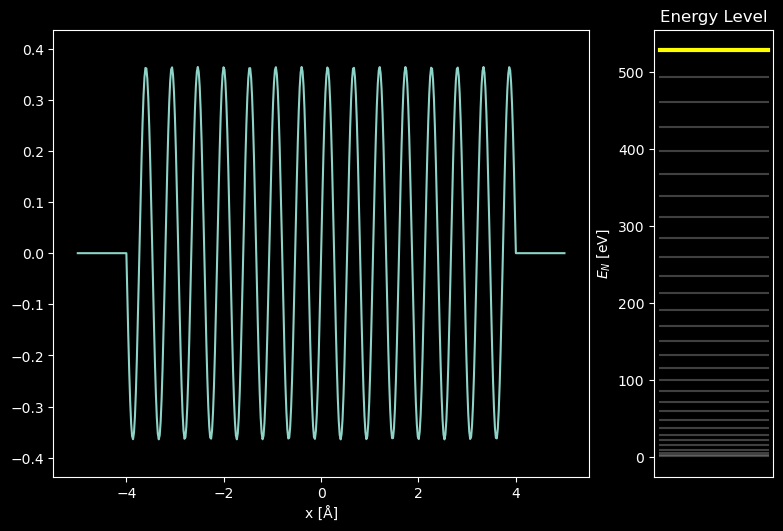

In [28]:
#7:
visualization_sw.plot_eigenstate(6)
visualization_sw.plot_eigenstate(15)
visualization_sw.plot_eigenstate(29)

8. In the case of an infinite square well, the potential outside of the well must be infinite, making the wave function zero outside of the well. This means the eigenstates are finite inside of the well. For SHO eigenstates, they extend to infinity, and are not bounded like the square well.

9. The number of extrema in each eigenstate = 1 + the quantum number of the eigenstate.

11. It appears that the wave function cuts off at the boundaries of the well (x = +-5), therefore the particle cannot exist outside of the square well potential in this scenario.

### Now it's your turn to define a potential

<ol start=10>
    <li>Write a function that defines a <em>finite square-well</em> potential (textbook section 5.4). You can choose the width of the well in Angstroms and the potential at the walls in eV. Calculate the finite square-well Hamiltonian and plot any five eigenstates you choose.</li>
    <li>Based on your plots, do you think a particle can get out of the finite square-well potential no matter its quantum number $n$?</li>
</ol>

Computing...
Took 0.03378748893737793
[-267.62534364 -254.18645612 -231.88258458 -200.87722835 -161.45949696
 -114.16887332  -60.22823755   -5.05280601    2.72073442    3.38939198
   10.75787869   12.43224101   23.69136972   26.53815343   40.50792986
   45.56610574   59.17426212   69.22565978   79.72331142   96.78654494
  105.95047566  126.51313659  138.20978576  156.42497655  174.84444855
  189.4844781   213.59739667  229.19688599  252.13228177  273.92989621]


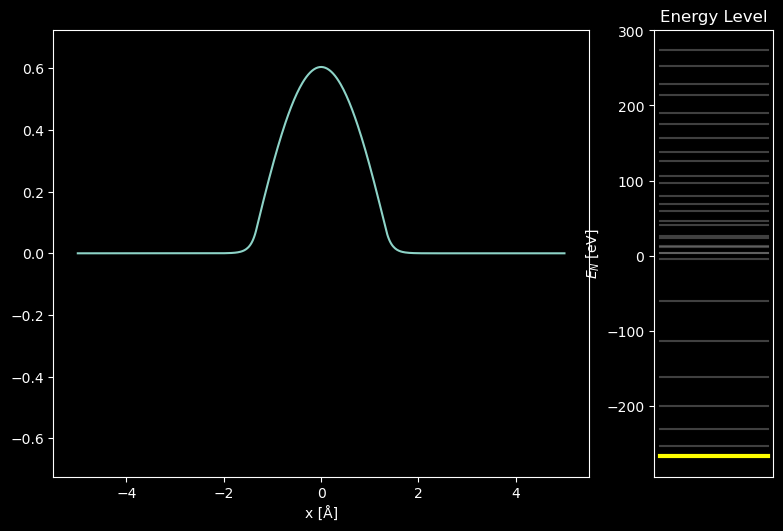

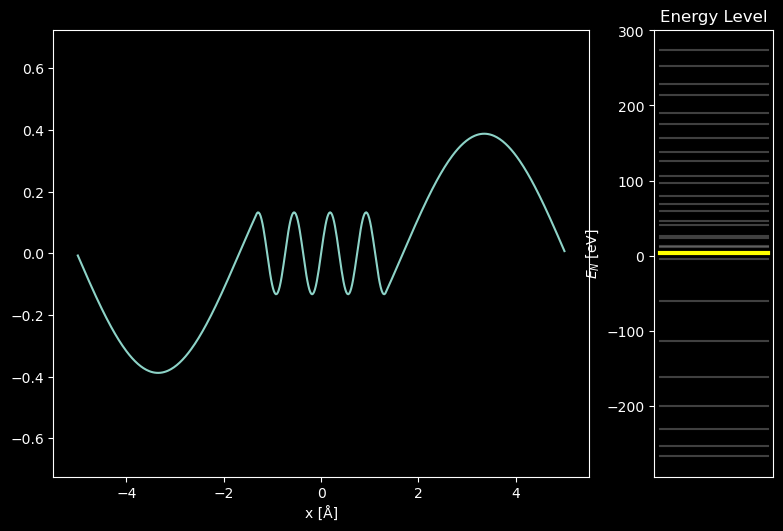

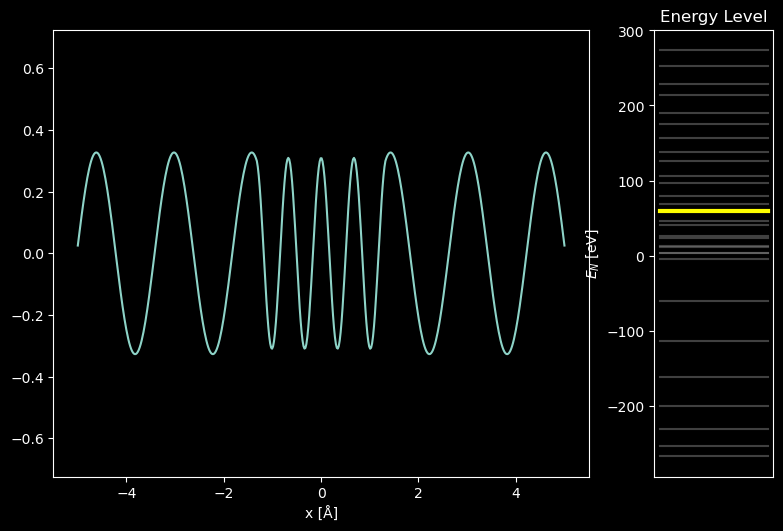

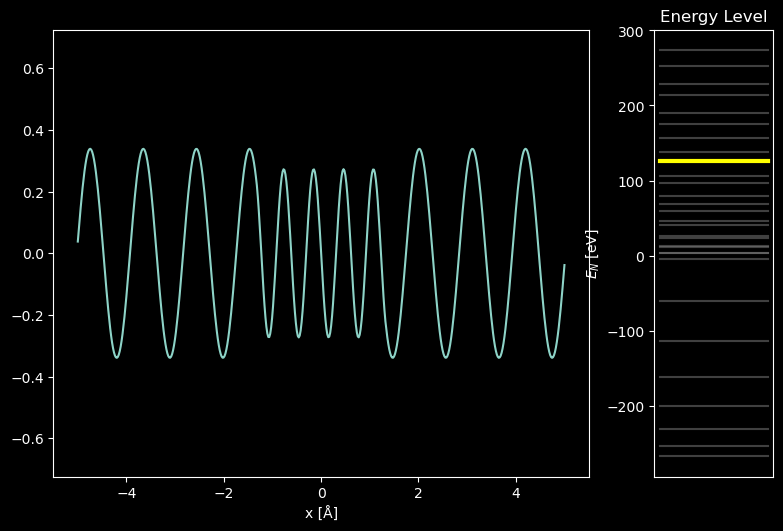

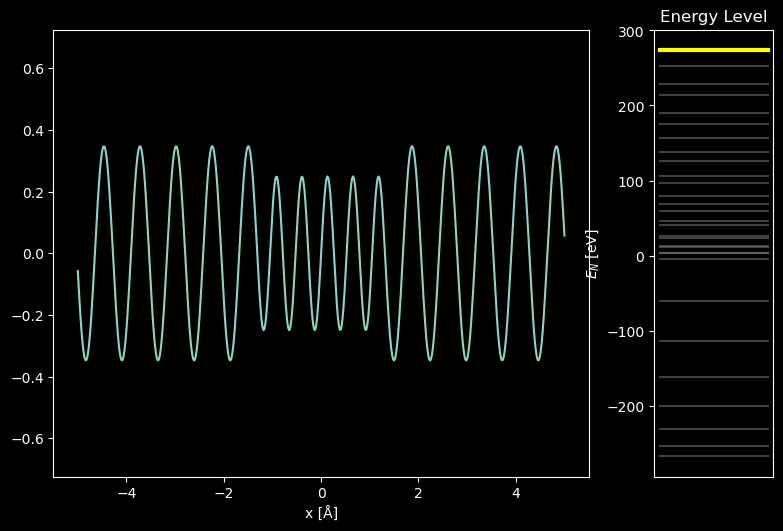

In [7]:
#10
def finite_well(particle, width, depth):
    potential = np.zeros_like(particle.x)
    in_well = np.abs(particle.x) <= width / 2
    potential[in_well] = - depth
    return potential


width = 5
depth = 10

H_fw = Hamiltonian(particles=SingleParticle(), 
                   potential=lambda particle: finite_well(particle, width, depth), 
                   spatial_ndim=1, N=512, extent=10*Å)

eigenstates_fw = H_fw.solve(max_states = 30)

print(eigenstates_fw.energies)

visualization_fw = init_visualization(eigenstates_fw)
visualization_fw.plot_eigenstate(0)
visualization_fw.plot_eigenstate(9)
visualization_fw.plot_eigenstate(16)
visualization_fw.plot_eigenstate(21)
visualization_fw.plot_eigenstate(29)